In [799]:
import numpy as np
import matplotlib.pyplot as plt

### 2D case

In [800]:
f = lambda x: np.exp(x)
x = np.linspace(0, 2)
y = f(x)

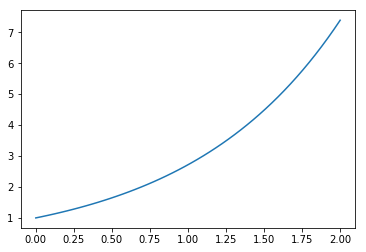

In [801]:
plt.plot(x, y);

In [821]:
# select n points randomly
n = 3
idx = np.random.choice(np.arange(0, x.shape[0]), size=n, replace=False)
sample_x, sample_y = x[idx], y[idx]
# idx = np.argsort(sample_x)
# sample_x = sample_x[idx]
# sample_y = sample_y[idx]

In [822]:
def build_lagrangian(xs, ys):
    """ Build lagrangian polynomial of order n-1, where n - number of points """
    n = xs.shape[0]
    
    l_i = lambda x, i: np.prod([(x - xs[j])/(xs[i] - xs[j]) for j in range(n) if j != i], axis=0)
    lagrange = lambda x: np.sum([ys[i] * l_i(x, i) for i in range(n)], axis=0)
    return lagrange

In [823]:
approx = build_lagrangian(sample_x, sample_y)

In [824]:
y_pred = approx(x)

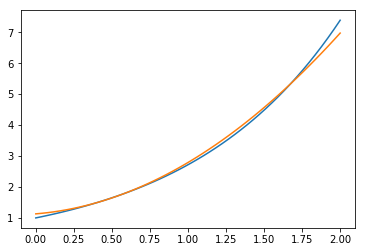

In [825]:
plt.plot(x, y)
plt.plot(x, y_pred);

### 3D case

In [826]:
f = lambda x, y: np.exp(x ** .5 + 3*y**.5 + 15)
x = np.linspace(0, 2)
y = np.linspace(0, 2)
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)

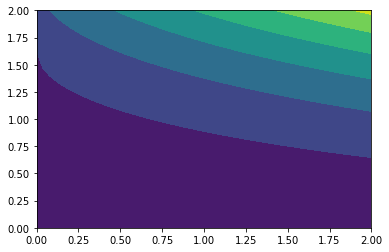

In [827]:
plt.contourf(xx, yy, zz);

In [842]:
n = 3
xi = np.random.choice(np.arange(0, x.shape[0]), size=n, replace=False)
yi = np.random.choice(np.arange(0, y.shape[0]), size=n, replace=False)
sample_x, sample_y, sample_z = x[xi], y[yi], zz[xi, :][:, yi]

In [843]:
sample_z

array([[3.13213855e+08, 3.32233458e+08, 1.43029788e+08],
       [2.98711805e+07, 3.16850785e+07, 1.36407396e+07],
       [3.90849558e+08, 4.14583513e+08, 1.78482301e+08]])

In [844]:
def build_lagrangian3D_bad(xs, ys, zs):
    """ Build lagrangian polynomial of order n-1, where n - number of points """
    ls = []
    n = xs.shape[0]
    for i in range(n):
        l_ix = lambda x, m: np.prod([(x - xs[j])/(xs[m] - xs[j]) for j in range(n) if j != m], axis=0)
        l_iy = lambda y, m: np.prod([(y - ys[j])/(ys[m] - ys[j]) for j in range(n) if j != m], axis=0)
        l_i = lambda x, y, m: l_ix(x, m) * l_iy(y, m)
        ls.append(l_i)
    lagrange = lambda x, y: np.sum([zs[i] * ls[i](x, y, i) for i in range(n)], axis=0)
    return lagrange

In [845]:
def build_lagrangian3D(xs, ys, zs):
    """ Build lagrangian polynomial of order n-1, where n - number of points """
    ls = []
    n = xs.shape[0]
    m = ys.shape[0]
    
    l_ix = lambda x, m: np.prod([(x - xs[j])/(xs[m] - xs[j]) for j in range(n) if j != m], axis=0)
    l_iy = lambda y, m: np.prod([(y - ys[j])/(ys[m] - ys[j]) for j in range(n) if j != m], axis=0)
    l_i = lambda x, y, i, j: l_ix(x, i) * l_iy(y, j)

    lagrange = lambda x, y: np.sum([zs[i, j] * l_i(x, y, i, j) for i in range(n) for j in range(m)], axis=0)
    return lagrange

In [849]:
# TODO: build lagrangian for arbitrary set of points, not in form of lattice!

In [846]:
lagrange = build_lagrangian3D(sample_x, sample_y, sample_z)

In [847]:
# zz_pred = lagrange(xx, yy)  # somehow x and y are swapped
zz_pred = lagrange(yy, xx)  # somehow x and y are swapped

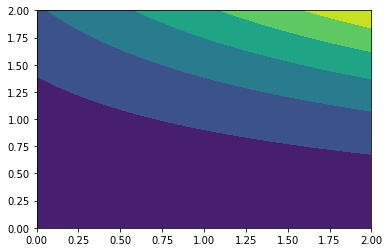

In [848]:
plt.contourf(xx, yy, zz_pred);

In [718]:
from tools import parse_file, gen_borders, gen_grid, rescale

In [719]:
points = rescale(parse_file("../resources/demo4.mod1"), 0.1, 0.9)
points[:, :-1] += 1
points = np.vstack([points, gen_borders(0, 3, 0, 3)])